In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

In [3]:
df = pd.read_csv('births.csv')

In [4]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
# 列出年份的具体列表
df.year.unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [8]:
# 把年份做成年代
df['decade'] = 10*(df['year']//10)
df.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [9]:
# 1. 数据透视表  统计每个年代F和M的个数
df_pivot = df.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
df_pivot

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [11]:
# or2. 使用分组聚合实现
df_group = df.groupby(['decade','gender'])['births'].sum().unstack()
df_group

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

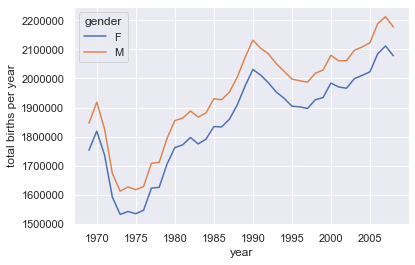

In [12]:
# 画图
df.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [13]:
# 消除异常值的影响，比如空值，错误输入值
# 使用sigma消除法 划定范围
quartiles = np.percentile(df['births'],[25,50,75])
mu = quartiles[1]
# 样本均值的稳定性估计(robust estimate),其中0.74是指标准正态分布的分位数间距
sig = 0.74*(quartiles[2]-quartiles[0])